In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Local imports,
from featexp import (
    get_trend_stats, 
    get_univariate_plots, 
    univariate_plotter
)

#### Download data from here: https://www.kaggle.com/c/home-credit-default-risk/data

In [2]:
# Functions for data preprocessing.
def get_nonull_dummy_data(
    application_train_raw, dummy_drop=["ORGANIZATION_TYPE"]
):
    # Idenifying float cols with less nulls and imputing with mean.
    nulls = pd.isnull(application_train_raw).sum()
    less_nulls = nulls[(nulls < 3075) & (nulls != 0)].index
    less_nulls_float = []
    for i in range(len(less_nulls)):
        if application_train_raw[less_nulls[i]].dtype != "O":
            less_nulls_float.append(less_nulls[i])

    application_train_raw[less_nulls_float] = application_train_raw[
        less_nulls_float
    ].fillna(application_train_raw[less_nulls_float].mean())

    # Idenifying float cols with high nulls and creating null_flag 
    # column and imputing with min-10.
    more_nulls = nulls[(nulls >= 3075)].index
    more_nulls_float = []
    for i in range(len(more_nulls)):
        if application_train_raw[more_nulls[i]].dtype != "O":
            more_nulls_float.append(more_nulls[i])

    application_train_raw[more_nulls_float] = application_train_raw[
        more_nulls_float
    ].fillna(application_train_raw[more_nulls_float].min() - 100)

    # Get dummies. Drop some columns for now.
    application_train_raw.drop(
        columns=dummy_drop, axis=1, inplace=True
    )  # Try using later.

    all_cols = application_train_raw.columns
    cat_cols = []
    for col in all_cols:
        if application_train_raw[col].dtype == "O":
            cat_cols.append(col)

    application_train_raw = pd.get_dummies(
        application_train_raw, columns=cat_cols, dummy_na=True
    )

    return application_train_raw


def import_and_create_train_test_data(test_size=0.33, random_state=42):
    application_raw = pd.read_csv("demo/data/application_train.csv")
    application = get_nonull_dummy_data(
        application_raw, dummy_drop=["ORGANIZATION_TYPE"]
    )

    X = application.drop(["TARGET"], axis=1)  # Contains ID.
    y = application["TARGET"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    train_users = X_train[["SK_ID_CURR"]]
    train_users["TARGET"] = y_train
    test_users = X_test[["SK_ID_CURR"]]
    test_users["TARGET"] = y_test
    train_users.reset_index(drop=True, inplace=True)
    test_users.reset_index(drop=True, inplace=True)

    return (X_train, X_test, y_train, y_test, train_users, test_users)


def import_and_create_TEST_data():
    application_raw = pd.read_csv("demo/data/application_test.csv")
    application = get_nonull_dummy_data(
        application_raw, dummy_drop=["ORGANIZATION_TYPE"]
    )

    X = application  # Contains ID.

    users = X[["SK_ID_CURR"]]
    users.reset_index(drop=True, inplace=True)

    return (X, users)


def get_imp_df(xgb_model):
    imp = pd.DataFrame(np.asarray(list(xgb_model.get_fscore().keys())))
    imp.columns = ["Feature"]
    imp["importance"] = np.asarray(list(xgb_model.get_fscore().values()))
    imp = imp.sort_values(by=["importance"], ascending=False)
    imp = imp.reset_index(drop=True)
    return imp

In [3]:
X_train, X_test, y_train, y_test, train_users, test_users = import_and_create_train_test_data()
X_TEST, TEST_users = import_and_create_TEST_data()

drop=['CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown', 'SK_ID_CURR']
X_train = X_train.drop(drop, axis=1)
X_test = X_test.drop(drop, axis=1)

/Users/abhaypawar/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/abhaypawar/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
data_train = X_train.reset_index(drop=True)
data_train['target'] = y_train.reset_index(drop=True)
data_test = X_test.reset_index(drop=True)
data_test['target'] = y_test.reset_index(drop=True)

                                        Plots for CNT_CHILDREN                                        
                                           Train data plots                                           


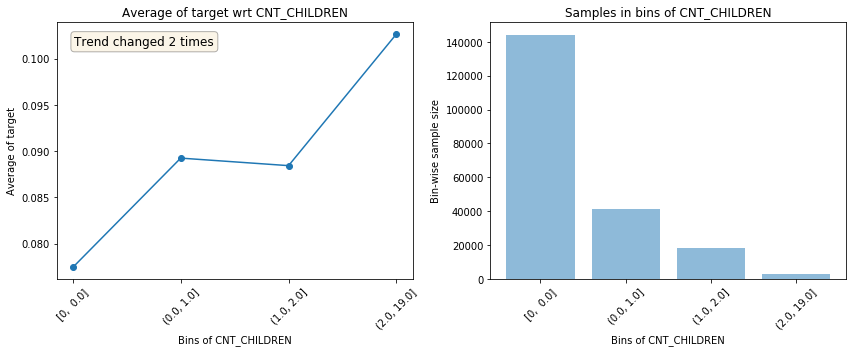

                                           Test data plots                                            


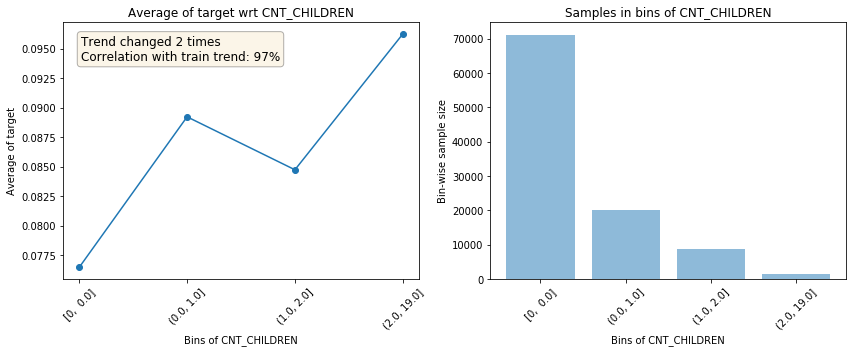

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


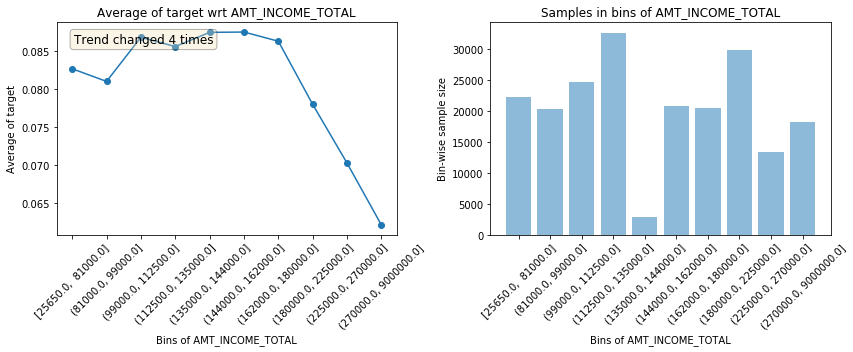

                                           Test data plots                                            


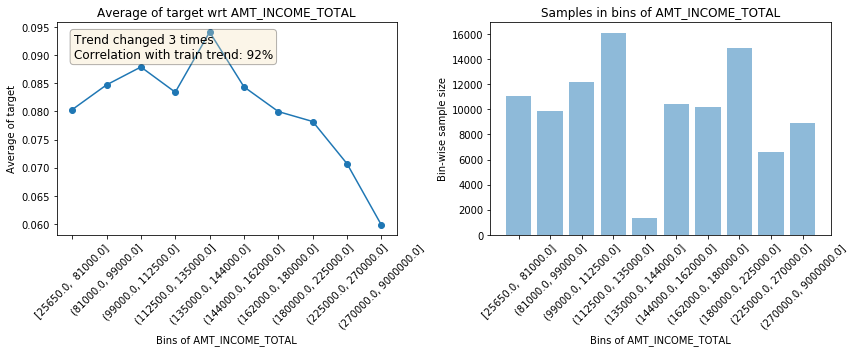

--------------------------------------------------------------------------------------------------------------


                                         Plots for AMT_CREDIT                                         
                                           Train data plots                                           


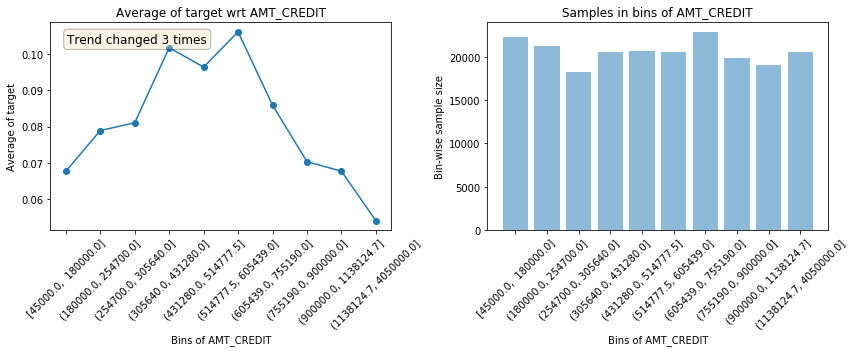

                                           Test data plots                                            


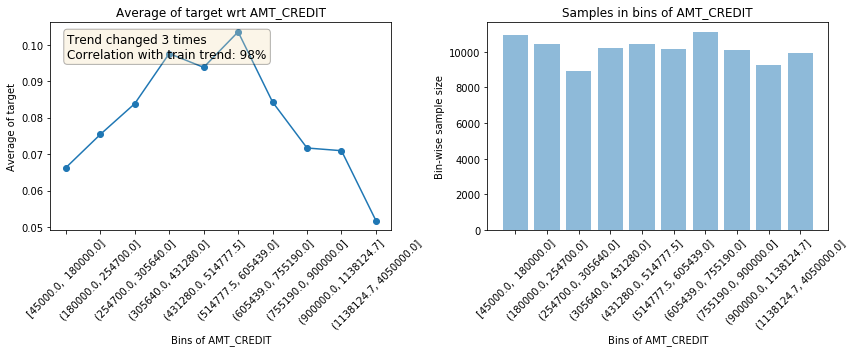

--------------------------------------------------------------------------------------------------------------


                                        Plots for AMT_ANNUITY                                         
                                           Train data plots                                           


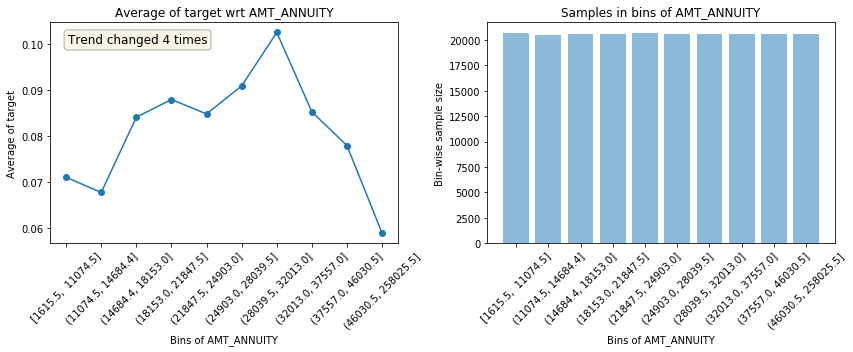

                                           Test data plots                                            


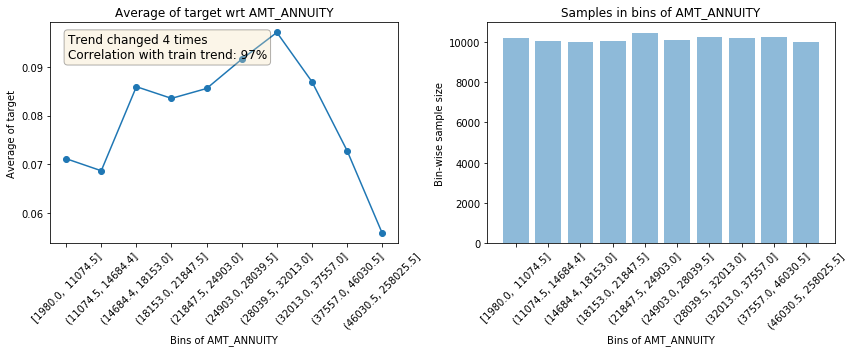

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_GOODS_PRICE                                       
                                           Train data plots                                           


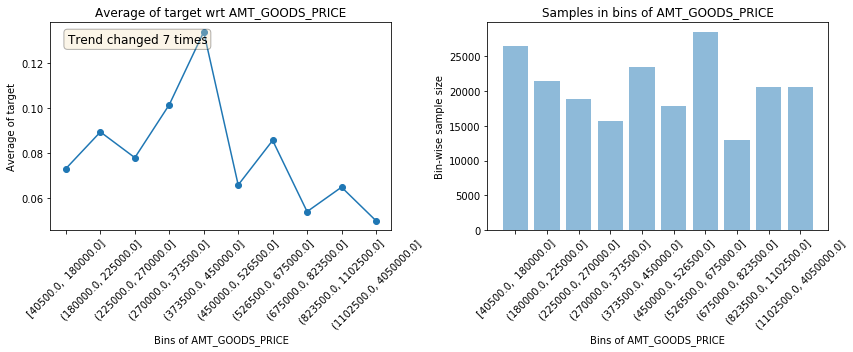

                                           Test data plots                                            


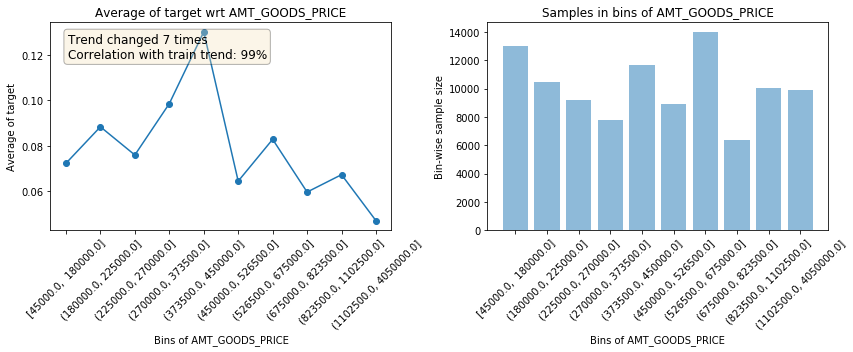

--------------------------------------------------------------------------------------------------------------


                                 Plots for REGION_POPULATION_RELATIVE                                 
                                           Train data plots                                           


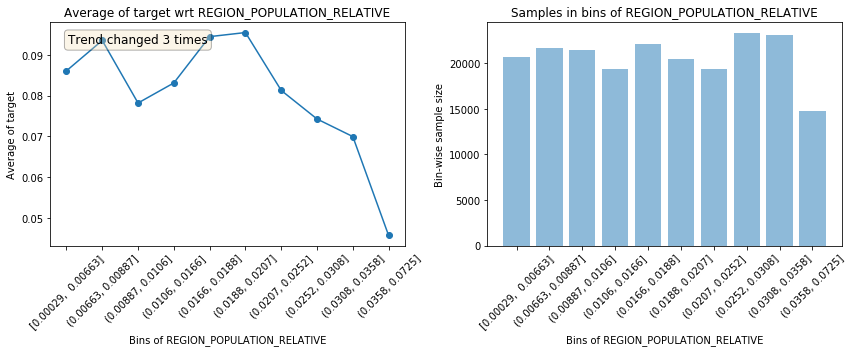

                                           Test data plots                                            


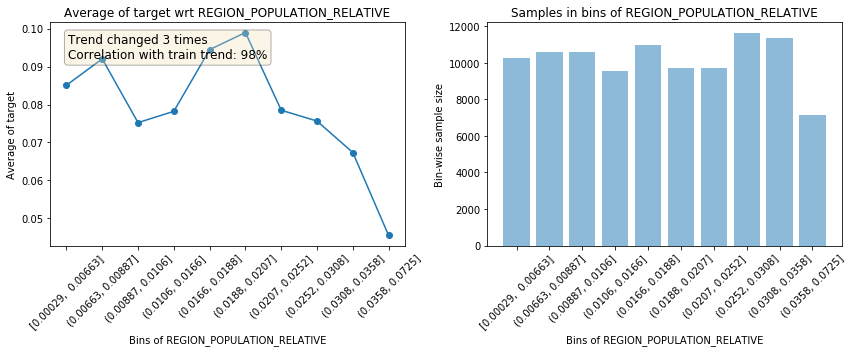

--------------------------------------------------------------------------------------------------------------


                                         Plots for DAYS_BIRTH                                         
                                           Train data plots                                           


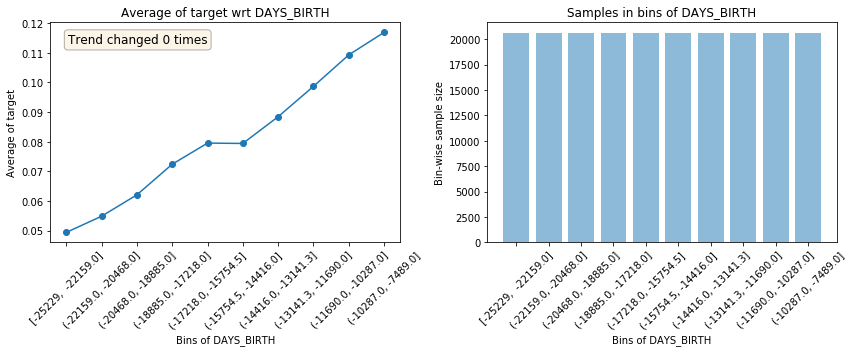

                                           Test data plots                                            


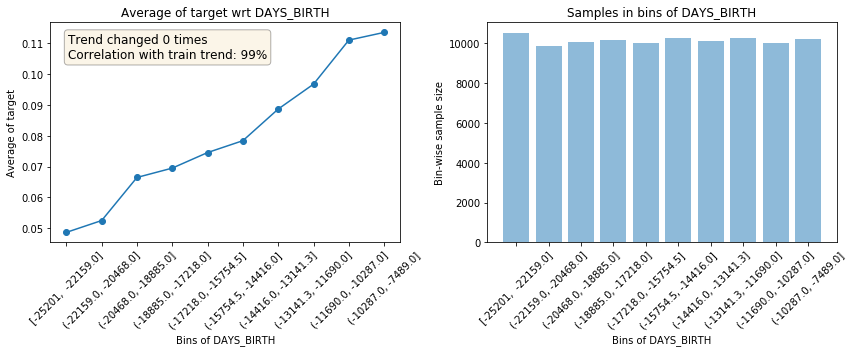

--------------------------------------------------------------------------------------------------------------


                                       Plots for DAYS_EMPLOYED                                        
                                           Train data plots                                           


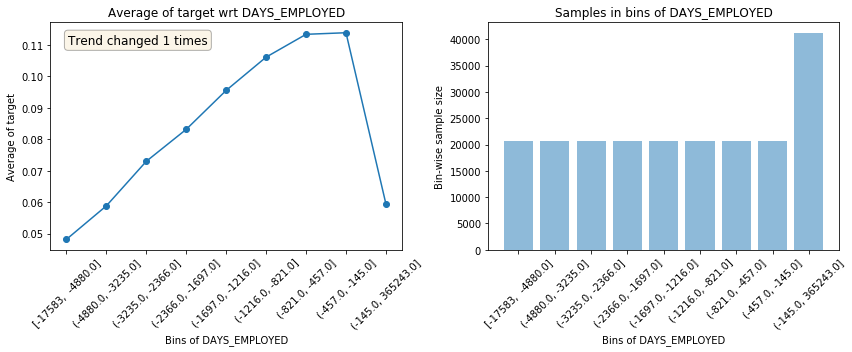

                                           Test data plots                                            


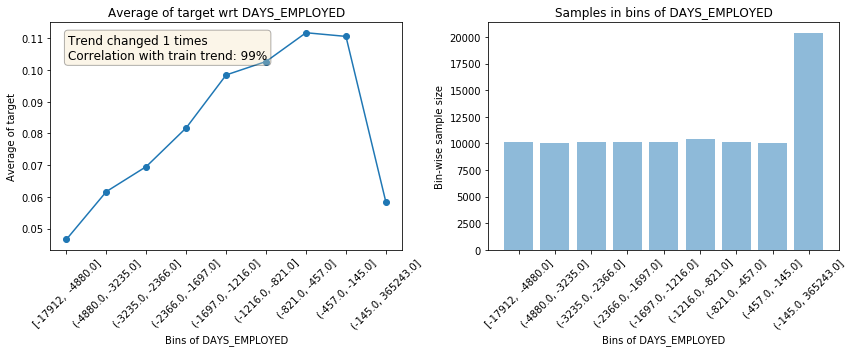

--------------------------------------------------------------------------------------------------------------


                                     Plots for DAYS_REGISTRATION                                      
                                           Train data plots                                           


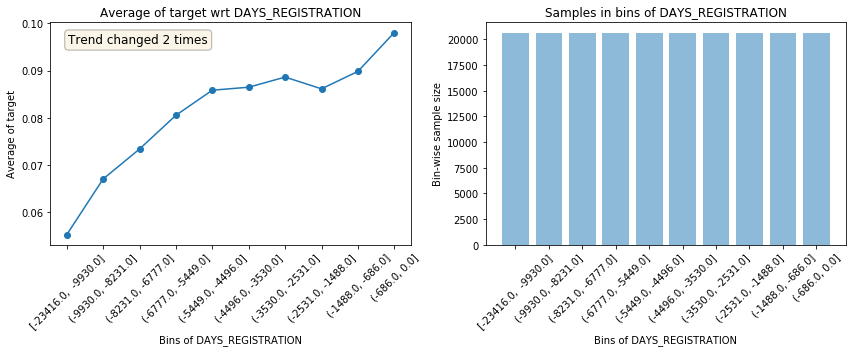

                                           Test data plots                                            


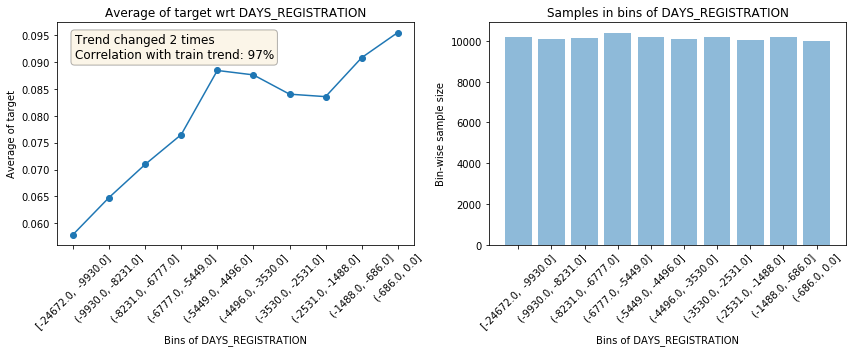

--------------------------------------------------------------------------------------------------------------


                                      Plots for DAYS_ID_PUBLISH                                       
                                           Train data plots                                           


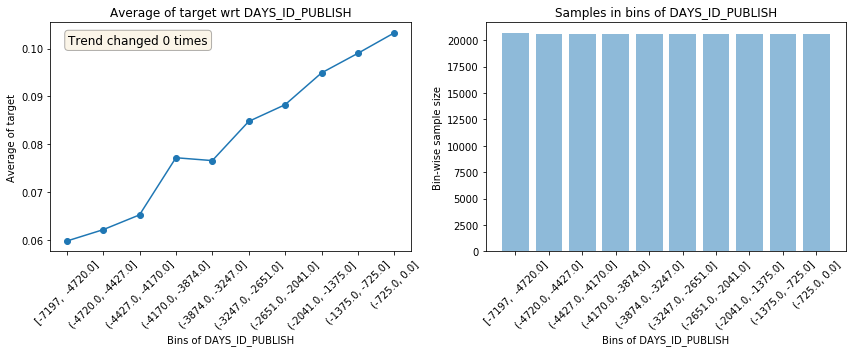

                                           Test data plots                                            


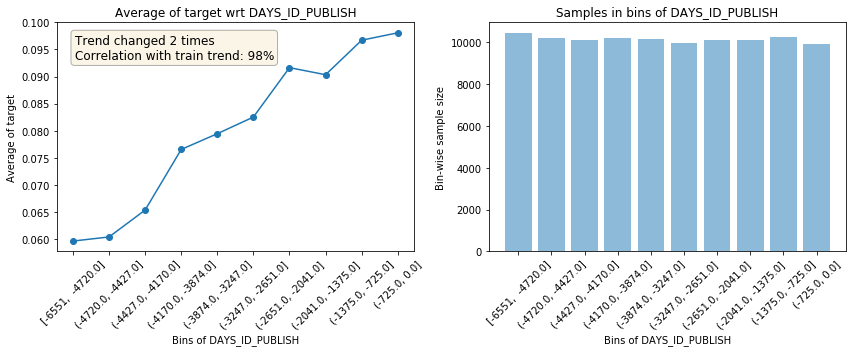

--------------------------------------------------------------------------------------------------------------




In [5]:
# plots univariate plots of first 10 columns in data_train
get_univariate_plots(data=data_train, target_col='target', features_list=data_train.columns[0:10], data_test=data_test)

                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


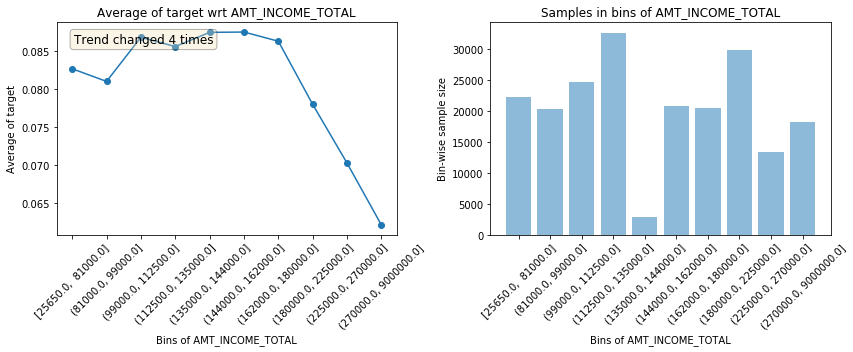

                                           Test data plots                                            


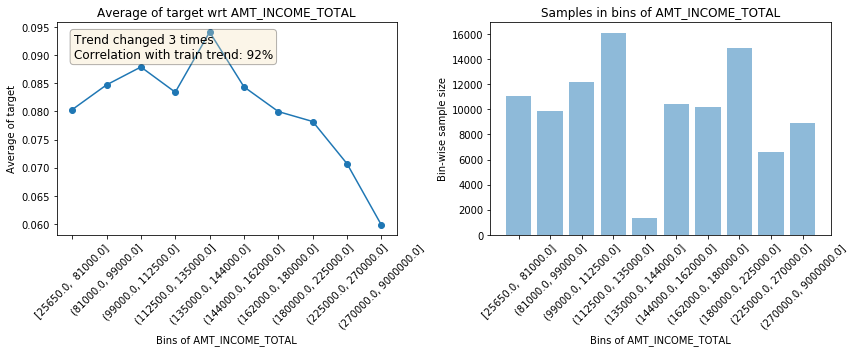

--------------------------------------------------------------------------------------------------------------




In [6]:
# Get grouped data, mean target and sample size of each group using univariate_plotter()
# With train and test data:
grouped_train, grouped_test = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL',
                                                 data_test=data_test)

# With only train data
# grouped_train = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL')

In [7]:
grouped_train #Grouped data showing bin level stats

,AMT_INCOME_TOTAL,Samples_in_bin,target_mean,AMT_INCOME_TOTAL_mean
0,"[25650.0, 81000.0]",22334,0.082699,66257.130366
1,"(81000.0, 99000.0]",20424,0.081032,91076.626816
2,"(99000.0, 112500.0]",24746,0.086842,111311.671092
3,"(112500.0, 135000.0]",32725,0.085623,131844.069914
4,"(135000.0, 144000.0]",2846,0.087491,142867.813598
5,"(144000.0, 162000.0]",20804,0.087531,157082.746126
6,"(162000.0, 180000.0]",20550,0.086326,178073.976044
7,"(180000.0, 225000.0]",29937,0.077997,212795.095082
8,"(225000.0, 270000.0]",13392,0.070266,259515.009845
9,"(270000.0, 9000000.0]",18274,0.062110,389590.875377


## Model trained using all features

In [26]:
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':16 } #col_sample_by_tree
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25) #, (dtest, 'test')


[19:59:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72177	test-auc:0.71409
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72820	test-auc:0.72108
[2]	train-auc:0.73023	test-auc:0.72218
[3]	train-auc:0.73226	test-auc:0.72482
[4]	train-auc:0.73273	test-auc:0.72497
[5]	train-auc:0.73418	test-auc:0.72633
[6]	train-auc:0.73455	test-auc:0.72663
[7]	train-auc:0.73482	test-auc:0.72738
[8]	train-auc:0.73631	test-auc:0.72877
[9]	train-auc:0.73745	test-auc:0.72958
[10]	train-auc:0.73814	test-auc:0.73035
[11]	train-auc:0.73845	test-auc:0.73063
[12]	train-auc:0.73868	test-auc:0

[191]	train-auc:0.78101	test-auc:0.76039
[192]	train-auc:0.78111	test-auc:0.76044
[193]	train-auc:0.78117	test-auc:0.76042
[194]	train-auc:0.78126	test-auc:0.76045
[195]	train-auc:0.78135	test-auc:0.76048
[196]	train-auc:0.78143	test-auc:0.76052
[197]	train-auc:0.78152	test-auc:0.76048
[198]	train-auc:0.78166	test-auc:0.76052
[199]	train-auc:0.78177	test-auc:0.76053
[200]	train-auc:0.78184	test-auc:0.76054
[201]	train-auc:0.78190	test-auc:0.76054
[202]	train-auc:0.78193	test-auc:0.76052
[203]	train-auc:0.78200	test-auc:0.76055
[204]	train-auc:0.78203	test-auc:0.76058
[205]	train-auc:0.78212	test-auc:0.76058
[206]	train-auc:0.78219	test-auc:0.76060
[207]	train-auc:0.78223	test-auc:0.76062
[208]	train-auc:0.78232	test-auc:0.76070
[209]	train-auc:0.78244	test-auc:0.76067
[210]	train-auc:0.78252	test-auc:0.76068
[211]	train-auc:0.78261	test-auc:0.76072
[212]	train-auc:0.78265	test-auc:0.76070
[213]	train-auc:0.78272	test-auc:0.76074
[214]	train-auc:0.78282	test-auc:0.76082
[215]	train-auc:

In [27]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns], missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_all_feats = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_all_feats.to_csv('submission_all_feats_1.csv', index=False)

## Calculating trend correlations and extracting feature importance from above model

In [28]:
stats = get_trend_stats(data=data_train, target_col='target', data_test=data_test)
# 0 correlation is returned for constant valued features and hence get dropped based on low correlation criteria

Only one bin created for FLAG_MOBIL. Correlation can't be calculated
Only one bin created for FLAG_CONT_MOBILE. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_Cash loans. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_nan. Correlation can't be calculated
Only one bin created for CODE_GENDER_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_CAR_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_REALTY_nan. Correlation can't be calculated
Only one bin created for NAME_INCOME_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_EDUCATION_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_FAMILY_STATUS_nan. Correlation can't be calculated
Only one bin created for NAME_HOUSING_TYPE_nan. Correlation can't be calculated
Only one bin created for WEEKDAY_APPR_PROCESS_START_nan. Correlation can't be calculated
Returning stats for all numeric features


In [29]:
importance_df = get_imp_df(xgb_model) # get xgboost importances in dataframe
stats = pd.merge(stats, importance_df, how='left', on='Feature')
stats['importance'] = stats['importance'].fillna(0)

## Dropping features with trend corr < 0.95

In [30]:
noisy = list(stats[stats['Trend_correlation']<0.95]['Feature'])
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)


[20:05:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72175	test-auc:0.71402
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72820	test-auc:0.72100
[2]	train-auc:0.73008	test-auc:0.72217
[3]	train-auc:0.73217	test-auc:0.72479
[4]	train-auc:0.73265	test-auc:0.72496
[5]	train-auc:0.73411	test-auc:0.72631
[6]	train-auc:0.73450	test-auc:0.72662
[7]	train-auc:0.73476	test-auc:0.72739
[8]	train-auc:0.73629	test-auc:0.72884
[9]	train-auc:0.73738	test-auc:0.72965
[10]	train-auc:0.73775	test-auc:0.73014
[11]	train-auc:0.73810	test-auc:0.73020
[12]	train-auc:0.73885	test-auc:0

[191]	train-auc:0.77956	test-auc:0.76055
[192]	train-auc:0.77968	test-auc:0.76057
[193]	train-auc:0.77977	test-auc:0.76052
[194]	train-auc:0.77987	test-auc:0.76048
[195]	train-auc:0.77994	test-auc:0.76049
[196]	train-auc:0.78001	test-auc:0.76049
[197]	train-auc:0.78011	test-auc:0.76055
[198]	train-auc:0.78022	test-auc:0.76057
[199]	train-auc:0.78029	test-auc:0.76053
[200]	train-auc:0.78033	test-auc:0.76054
[201]	train-auc:0.78040	test-auc:0.76053
[202]	train-auc:0.78051	test-auc:0.76054
[203]	train-auc:0.78066	test-auc:0.76064
[204]	train-auc:0.78071	test-auc:0.76068
[205]	train-auc:0.78079	test-auc:0.76069
[206]	train-auc:0.78092	test-auc:0.76071
[207]	train-auc:0.78099	test-auc:0.76073
[208]	train-auc:0.78109	test-auc:0.76078
[209]	train-auc:0.78114	test-auc:0.76077
[210]	train-auc:0.78124	test-auc:0.76075
[211]	train-auc:0.78126	test-auc:0.76074
[212]	train-auc:0.78134	test-auc:0.76075
[213]	train-auc:0.78138	test-auc:0.76075
[214]	train-auc:0.78146	test-auc:0.76080
[215]	train-auc:

In [31]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_95 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_95.to_csv('submission_95_1.csv', index=False)


## Dropping features with trend corr < 0.93

In [32]:
noisy = list(stats[stats['Trend_correlation']<0.93]['Feature'])
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':16 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)


[20:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72175	test-auc:0.71402
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72820	test-auc:0.72100
[2]	train-auc:0.73008	test-auc:0.72217
[3]	train-auc:0.73217	test-auc:0.72479
[4]	train-auc:0.73265	test-auc:0.72496
[5]	train-auc:0.73411	test-auc:0.72631
[6]	train-auc:0.73450	test-auc:0.72662
[7]	train-auc:0.73476	test-auc:0.72739
[8]	train-auc:0.73629	test-auc:0.72884
[9]	train-auc:0.73738	test-auc:0.72965
[10]	train-auc:0.73775	test-auc:0.73014
[11]	train-auc:0.73810	test-auc:0.73020
[12]	train-auc:0.73885	test-auc:0

[191]	train-auc:0.78000	test-auc:0.76043
[192]	train-auc:0.78011	test-auc:0.76045
[193]	train-auc:0.78019	test-auc:0.76045
[194]	train-auc:0.78027	test-auc:0.76045
[195]	train-auc:0.78032	test-auc:0.76040
[196]	train-auc:0.78040	test-auc:0.76043
[197]	train-auc:0.78045	test-auc:0.76042
[198]	train-auc:0.78054	test-auc:0.76049
[199]	train-auc:0.78063	test-auc:0.76051
[200]	train-auc:0.78075	test-auc:0.76063
[201]	train-auc:0.78082	test-auc:0.76064
[202]	train-auc:0.78091	test-auc:0.76064
[203]	train-auc:0.78099	test-auc:0.76065
[204]	train-auc:0.78106	test-auc:0.76064
[205]	train-auc:0.78113	test-auc:0.76066
[206]	train-auc:0.78121	test-auc:0.76067
[207]	train-auc:0.78125	test-auc:0.76068
[208]	train-auc:0.78132	test-auc:0.76071
[209]	train-auc:0.78141	test-auc:0.76074
[210]	train-auc:0.78147	test-auc:0.76075
[211]	train-auc:0.78153	test-auc:0.76074
[212]	train-auc:0.78158	test-auc:0.76070
[213]	train-auc:0.78167	test-auc:0.76067
[214]	train-auc:0.78177	test-auc:0.76070
[215]	train-auc:

In [33]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_93 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_93.to_csv('submission_93_1.csv', index=False)

## Dropping features with trend corr < 0.90

In [34]:
noisy = list(stats[stats['Trend_correlation']<0.90]['Feature'])
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[20:08:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72175	test-auc:0.71402
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72820	test-auc:0.72100
[2]	train-auc:0.73008	test-auc:0.72217
[3]	train-auc:0.73217	test-auc:0.72479
[4]	train-auc:0.73265	test-auc:0.72496
[5]	train-auc:0.73411	test-auc:0.72631
[6]	train-auc:0.73450	test-auc:0.72662
[7]	train-auc:0.73477	test-auc:0.72737
[8]	train-auc:0.73627	test-auc:0.72878
[9]	train-auc:0.73741	test-auc:0.72959
[10]	train-auc:0.73811	test-auc:0.73036
[11]	train-auc:0.73842	test-auc:0.73064
[12]	train-auc:0.73866	test-auc:0

[191]	train-auc:0.78063	test-auc:0.76074
[192]	train-auc:0.78071	test-auc:0.76075
[193]	train-auc:0.78080	test-auc:0.76080
[194]	train-auc:0.78088	test-auc:0.76081
[195]	train-auc:0.78095	test-auc:0.76082
[196]	train-auc:0.78106	test-auc:0.76080
[197]	train-auc:0.78114	test-auc:0.76081
[198]	train-auc:0.78126	test-auc:0.76080
[199]	train-auc:0.78134	test-auc:0.76086
[200]	train-auc:0.78139	test-auc:0.76085
[201]	train-auc:0.78147	test-auc:0.76085
[202]	train-auc:0.78154	test-auc:0.76086
[203]	train-auc:0.78165	test-auc:0.76088
[204]	train-auc:0.78173	test-auc:0.76092
[205]	train-auc:0.78181	test-auc:0.76093
[206]	train-auc:0.78190	test-auc:0.76091
[207]	train-auc:0.78197	test-auc:0.76094
[208]	train-auc:0.78202	test-auc:0.76096
[209]	train-auc:0.78214	test-auc:0.76099
[210]	train-auc:0.78219	test-auc:0.76098
[211]	train-auc:0.78227	test-auc:0.76094
[212]	train-auc:0.78236	test-auc:0.76104
[213]	train-auc:0.78242	test-auc:0.76104
[214]	train-auc:0.78249	test-auc:0.76104
[215]	train-auc:

In [35]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_90 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_90.to_csv('submission_90_1.csv', index=False)

## Dropping features with trend corr < 0.95 and feature importance < 40

In [ ]:
noisy = list(stats[(stats['Trend_correlation']<0.9) & (stats['importance']<10)]['Feature']) # 
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':16}
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)
# [149]	train-auc:0.77722	test-auc:0.75991
# 0.74106 train-auc:0.78435	test-auc:0.76053 with <0.97

[20:52:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72177	test-auc:0.71409
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72820	test-auc:0.72108
[2]	train-auc:0.73023	test-auc:0.72218
[3]	train-auc:0.73226	test-auc:0.72482
[4]	train-auc:0.73273	test-auc:0.72497
[5]	train-auc:0.73418	test-auc:0.72633
[6]	train-auc:0.73455	test-auc:0.72663
[7]	train-auc:0.73482	test-auc:0.72738
[8]	train-auc:0.73631	test-auc:0.72877
[9]	train-auc:0.73745	test-auc:0.72958
[10]	train-auc:0.73814	test-auc:0.73035
[11]	train-auc:0.73845	test-auc:0.73063
[12]	train-auc:0.73868	test-auc:0

In [ ]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_95_40 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_95_40.to_csv('submission_95_40_1.csv', index=False)
